In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

### Read image & Convert image to gray-scale

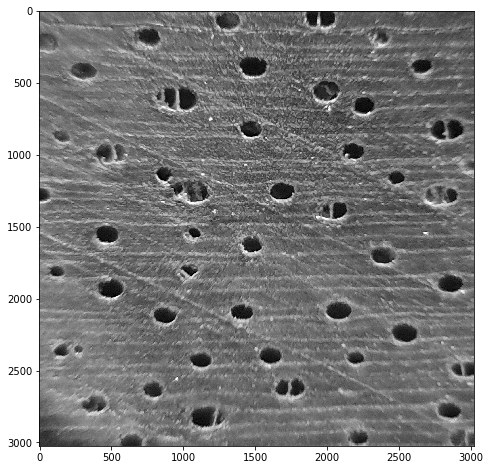

In [2]:
image = 'Asset/3011 (2).jpg'
#image = 'Asset/6867.jpg'
#image = 'Asset/14734.jpg'
#image = 'Asset/10E1P451.jpg'
#image = 'Asset/20809.jpg'
#image = 'Asset/23255.jpg'
img = cv2.imread(image, 1)
img_orig = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
M, N = img.shape

kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])
img = cv2.filter2D(img, -1, kernel_sharpening)

plt.rcParams["figure.figsize"] = (8,8)
plt.imshow(img, cmap='gray')

## Blur Image to Reduce Noise

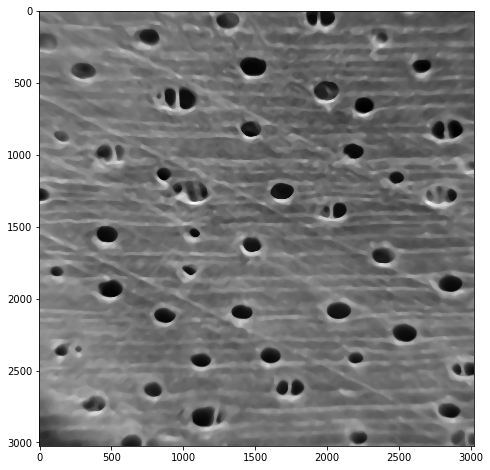

In [3]:
#img = cv2.GaussianBlur(img, (21, 21), cv2.BORDER_DEFAULT)
for _ in range(5):
    img = cv2.medianBlur(img, 21)

plt.rcParams["figure.figsize"] = (8, 8)
plt.imshow(img, cmap='gray')

## Image Thresholding

#### 1. Image Thresholding (Otsu's Binarization)

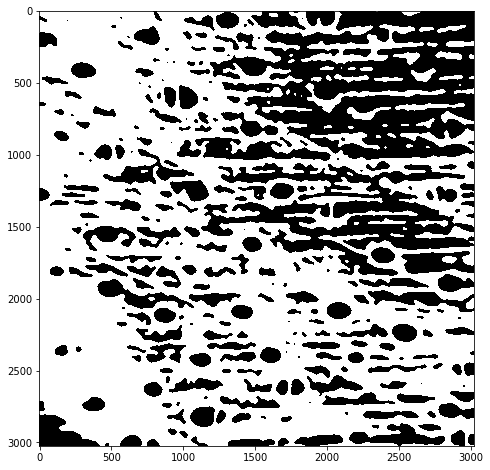

In [4]:
ret, th = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.rcParams["figure.figsize"] = (8, 8)
plt.imshow(th, cmap='gray')

#### 2. Image Thresholding (Adaptive Thresholding)

In [5]:
#th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,\
#                           cv2.THRhttp://localhost:8888/notebooks/KP%20LIPI%202019/AIKO/circle_detection.ipynb#ESH_BINARY, 31, 20)
#plt.rcParams["figure.figsize"] = (8, 8)
#plt.imshow(th, cmap='gray')

## Apply hough transform on the image

In [6]:
#all_circle = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 60, param1=100, 
#                              param2=20, minRadius=30, maxRadius=60)

all_circle = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 100, 
                              param1=50,param2=30, 
                              minRadius=10, maxRadius=150)

In [7]:
if all_circle is not None:
    all_circle_rounded = np.uint16(np.around(all_circle))
    for i in all_circle_rounded[0,:]:
        # draw the outer circle
        cv2.circle(img_orig,(i[0],i[1]),i[2],(0,255,0),15)
        # draw the center of the circle
        cv2.circle(img_orig,(i[0],i[1]),2,(0,0,255),5)

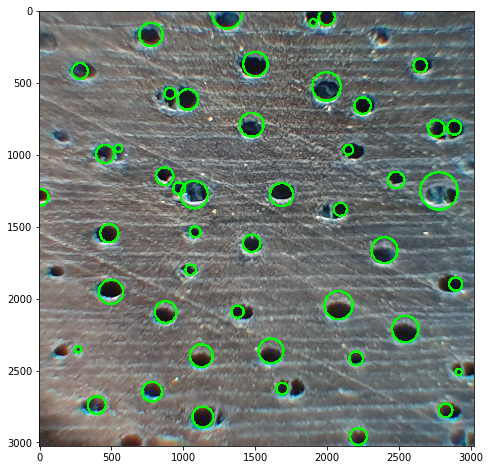

In [8]:
plt.rcParams["figure.figsize"] = (8, 8)
plt.imshow(img_orig)

## Detected Circles

In [9]:
print(all_circle_rounded)
all_circle_rounded = all_circle_rounded[0].tolist()
detected_circle = len(all_circle_rounded)
print('Detected circle = ', str(detected_circle))

[[[2082 2044   98]
  [1998  524   99]
  [1478  790   83]
  [2250  658   57]
  [1478 1614   60]
  [1306   18  103]
  [1686 1276   80]
  [ 880 2092   75]
  [2402 1662   90]
  [1612 2362   86]
  [1034  614   71]
  [1690 2624   40]
  [2546 2210   92]
  [2000   42   56]
  [2826 2776   47]
  [1078 1276   95]
  [1504  368   85]
  [ 874 1148   61]
  [1138 2822   72]
  [1380 2090   42]
  [2650  378   47]
  [2780 1250  130]
  [1128 2396   79]
  [ 460  994   63]
  [2094 1378   45]
  [ 284  416   55]
  [2886  810   49]
  [ 778  162   81]
  [2762  816   57]
  [2482 1174   57]
  [ 910  572   38]
  [1086 1534   37]
  [ 488 1544   63]
  [2220 2958   58]
  [ 402 2740   62]
  [2918 2510   22]
  [ 786 2646   68]
  [ 500 1952   84]
  [2150  964   34]
  [2896 1898   46]
  [1906   80   25]
  [ 974 1232   41]
  [1054 1798   36]
  [ 552  954   25]
  [ 272 2352   22]
  [   8 1294   58]
  [2204 2414   47]]]
Detected circle =  47


###### Average Radius

In [10]:
radius_avg = 0
for i in all_circle_rounded:
    print(i[2])
    radius_avg += i[2]
radius_avg = radius_avg/len(all_circle_rounded)
print('Radius average = ', str(radius_avg))

98
99
83
57
60
103
80
75
90
86
71
40
92
56
47
95
85
61
72
42
47
130
79
63
45
55
49
81
57
57
38
37
63
58
62
22
68
84
34
46
25
41
36
25
22
58
47
Radius average =  62.148936170212764


###### Circle Density

> Calculate density ver.1

In [11]:
dens = (detected_circle * radius_avg) / (M * N)
print('Ver.1 Density = ', str(dens))

Ver.1 Density =  0.0003194243232272333
